# Exploration des données

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules.loader import Loader
import plotly.express as px

from datetime import datetime

raw = '../../datas/RAW/E2/'
dfs = []

# Extraction des donnees

In [2]:
Loader.extract_data(
    '../../datas/RAW/E2/',
    '../../datas/ZIP/archive.zip'
)

Extracted 9 files in '../../datas/RAW/E2/'


## Exploration de la geolocalisation

In [3]:
geolocalisation = pd.read_csv(raw + 'olist_geolocation_dataset.csv')
dfs.append(geolocalisation)
print(geolocalisation.shape)
geolocalisation.head(5)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
print('nb villes: ', len(geolocalisation.geolocation_city.unique()), '\n', geolocalisation.geolocation_city.unique())
print('nb etats: ', len(geolocalisation.geolocation_state.unique()), '\n', geolocalisation.geolocation_state.unique())

nb villes:  8011 
 ['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
nb etats:  27 
 ['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


![Population of brazil by state](documentation\2012_population_by_state.png)

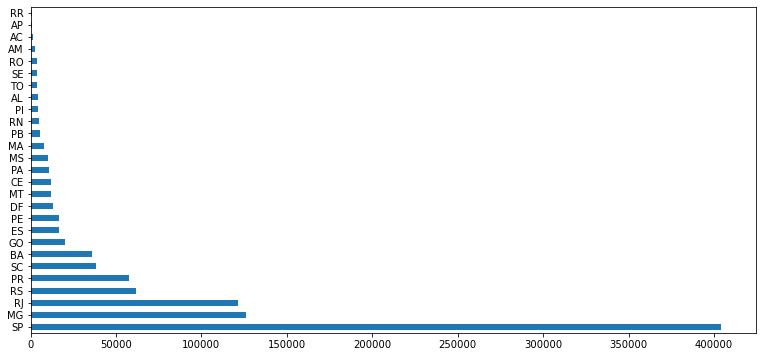

In [5]:
geolocalisation.geolocation_state.value_counts().plot(kind='barh', figsize=(13,6));

# Table customer

In [6]:
customer = pd.read_csv(raw + 'olist_customers_dataset.csv')
dfs.append(customer)
print(customer.shape)
customer.head(5)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
print('nb villes: ', len(customer.customer_city.unique()), '\n', customer.customer_city.unique())
print('nb etats: ', len(customer.customer_state.unique()), '\n', customer.customer_state.unique())

nb villes:  4119 
 ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
nb etats:  27 
 ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


# Table orders

In [8]:
order = pd.read_csv(raw + 'olist_orders_dataset.csv')
dfs.append(order)
print(order.shape)
order.head(5)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
print('Status: ', order.order_status.unique())
order['order_status'].value_counts()

Status:  ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

# Table order items

In [10]:
order_items = pd.read_csv(raw + 'olist_order_items_dataset.csv')
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

dfs.append(order_items)
print(order_items.shape)
order_items.head(5)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


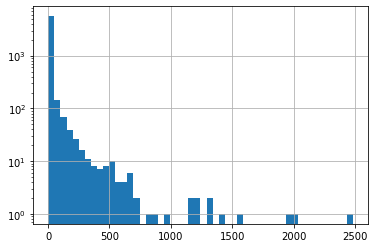

In [11]:
order_items.price.value_counts().hist(log=True, bins=50);

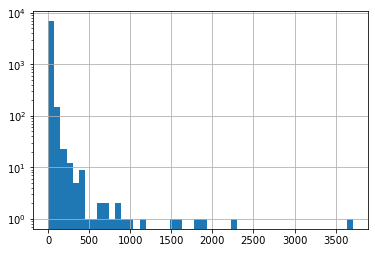

In [12]:
order_items.freight_value.value_counts().hist(log=True, bins=50);

In [13]:
order_items.sort_values(by='shipping_limit_date', inplace=True)
# an mois jour
min = pd.Timestamp(2018, 3, 1)
max = pd.Timestamp(2018, 6, 30)
mask = (order_items['shipping_limit_date'] >= min) & (order_items['shipping_limit_date'] < max)
order_items = order_items[mask]


In [14]:
def bin_f(x):
    d, m, y = x.date().day, x.date().month, x.date().year
    h = x.time().hour
    if h < 6:
        return "{:04d} {:02d} {:02d} 1ear".format(y, m, d)
    elif h < 12:
        return "{:04d} {:02d} {:02d} 2mor".format(y, m, d)
    elif h < 18:
        return "{:04d} {:02d} {:02d} 3aft".format(y, m, d)
    else:
        return "{:04d} {:02d} {:02d} 4nig".format(y, m, d)

order_items["bin"] = order_items["shipping_limit_date"].apply(bin_f)
grouped = order_items.groupby("bin", as_index=False)['price'].agg(np.sum)
grouped.columns = ['time_bin', 'somme']
grouped.set_index('time_bin', inplace=True)
order_items.sort_index(inplace=True)

C:\Users\nicol\AppData\Local\Temp/ipykernel_3648/3708261340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items["bin"] = order_items["shipping_limit_date"].apply(bin_f)
F:\Anaconda\envs\E2\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


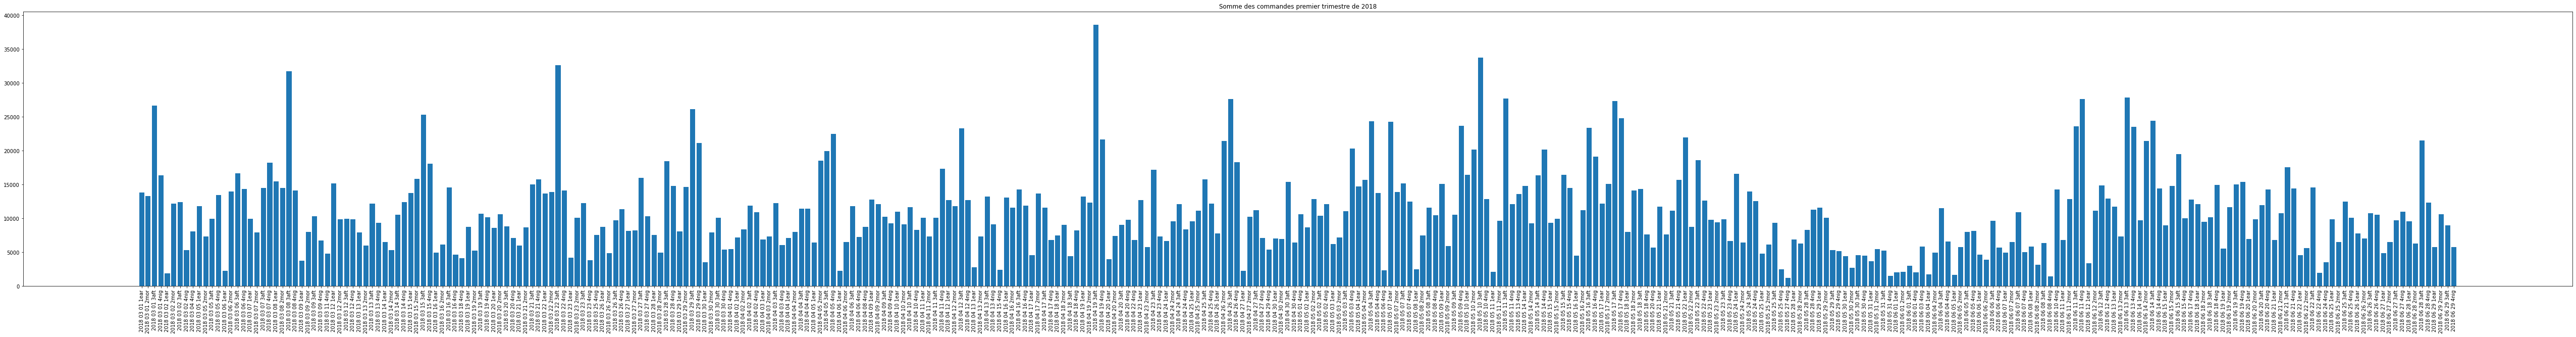

In [15]:
plt.figure(figsize=(len(grouped)/4, 10))
plt.xticks(rotation=90)
plt.bar(grouped.index, grouped.somme);
plt.title('Somme des commandes premier trimestre de 2018')
plt.savefig('plots/somme_commande_tri_2018.png')
plt.show()

# Table products

In [16]:
products = pd.read_csv(raw + 'olist_products_dataset.csv')
dfs.append(products)
print(products.shape)
products.head(5)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
products.columns[-4:]

Index(['product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [90]:
products.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64